# KNN = K nearest neighbour

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## knn and svm for smaller dataset only upto 1000 rows only

### it gets slower if more data is present

# step 1 = data ingestion

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 2 = data quality check

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.shape

(149, 5)

In [14]:
df.duplicated().sum()

np.int64(0)

# Step 3 = seperate x and y(species)

In [16]:
x = df.drop(columns= ["species"])
y = df[["species"]]

In [17]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [19]:
x.shape

(149, 4)

In [20]:
y.shape

(149, 1)

<Axes: xlabel='species'>

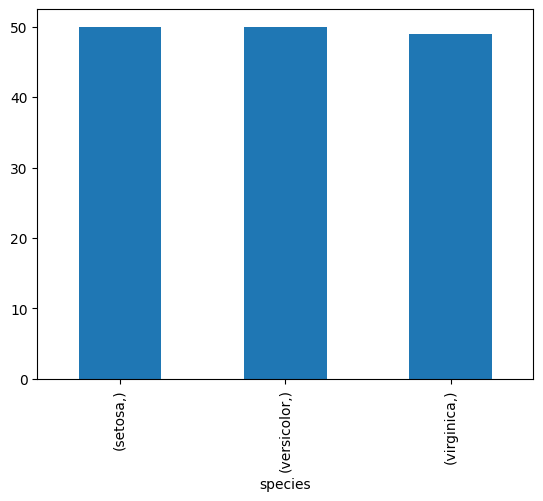

In [22]:
y.value_counts().plot(kind="bar")

# step 4 = apply preprocessing

In [24]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [27]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [28]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [29]:
# Step 5 = Train test split

In [30]:
from sklearn.model_selection import train_test_split


In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)


In [42]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
22,-1.501855,1.242352,-1.560289,-1.308624
15,-0.173447,3.081959,-1.276496,-1.045486
65,1.034197,0.092598,0.369502,0.270202
11,-1.260327,0.782450,-1.219738,-1.308624
42,-1.743384,0.322549,-1.390014,-1.308624


In [43]:
ytrain.head()

,species
22,setosa
15,setosa
65,versicolor
11,setosa
42,setosa


In [44]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.309611,-0.597255,0.539778,0.007064
18,-0.173447,1.702254,-1.162979,-1.177055
117,2.241842,1.702254,1.674949,1.322752
78,0.188846,-0.367304,0.426261,0.401770
76,1.154962,-0.597255,0.596536,0.270202


In [45]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


# step 6 = build the model

# 1 = KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier



In [47]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(xtrain,ytrain)

KNeighborsClassifier()

In [48]:
model1.score(xtrain,ytrain)

0.9663865546218487

In [49]:
model1.score(xtest,ytest)

1.0

# hyperparametes tuning

In [71]:
params = {
    "n_neighbors" : [2,4,5,6,7,8,9]
}

In [72]:
from sklearn.model_selection import GridSearchCV

base_model = KNeighborsClassifier()

gscv = GridSearchCV(base_model, param_grid=params, cv=5, scoring="f1_macro", n_jobs=-1)

gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1 , xtrain , ytrain ,cv=5, scoring="f1_macro")
scores.mean()

np.float64(0.9306878306878307)

In [73]:
gscv.best_params_


{'n_neighbors': 6}

In [74]:
gscv.best_score_


np.float64(0.9478835978835978)

In [75]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=6)

In [76]:
best_knn.score(xtrain, ytrain)


0.9663865546218487

In [77]:
best_knn.score(xtest,ytest)

1.0

# 2 = SVM  = support vector machine

In [58]:
from sklearn.svm import SVC

model2 = SVC(probability=True)

In [59]:
model2.fit(xtrain,ytrain)

SVC(probability=True)

In [60]:
model2.score(xtrain,ytrain)

0.9663865546218487

In [61]:
model2.score(xtest,ytest)

1.0

In [63]:
scores_svc = cross_val_score(model2,xtrain,ytrain,cv=5,scoring="f1_macro")
scores_svc.mean()

np.float64(0.9574861739567622)

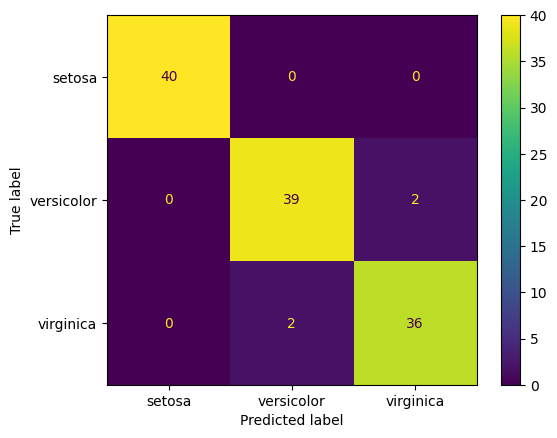

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model2,xtrain,ytrain)

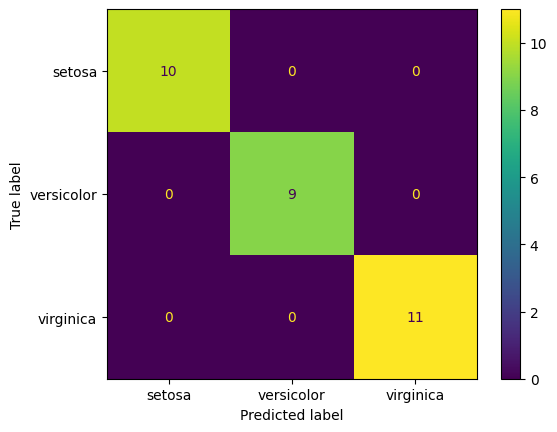

In [79]:
ConfusionMatrixDisplay.from_estimator(model2, xtest, ytest)


In [80]:
ypred_test = model2.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [81]:
ytest.head()


,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [82]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# choose svc for higher f1 score

In [67]:

xnew = pd.read_csv('iris_sample.csv')

In [68]:
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [83]:
xnew.isna().sum()


sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [84]:
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [85]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [87]:

preds = model2.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [88]:

probs = model2.predict_proba(xnew_pre)
probs

array([[0.00669887, 0.966284  , 0.02701713],
       [0.01154234, 0.01658717, 0.97187048],
       [0.02973201, 0.9571412 , 0.01312679],
       [0.52239902, 0.39192974, 0.08567124],
       [0.01017414, 0.20435321, 0.78547265],
       [0.96708389, 0.01982841, 0.0130877 ],
       [0.02732092, 0.96570231, 0.00697678],
       [0.00797475, 0.02861993, 0.96340532],
       [0.97230628, 0.016839  , 0.01085473],
       [0.79786621, 0.15477517, 0.04735862],
       [0.01032256, 0.98260079, 0.00707665],
       [0.01142139, 0.98075471, 0.0078239 ],
       [0.02205129, 0.02279525, 0.95515346],
       [0.01744611, 0.81709112, 0.16546277],
       [0.01822144, 0.4772192 , 0.50455937]])

In [90]:
model2.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [91]:
xnew["species"] = preds
xnew[model2.classes_] = probs
xnew = xnew.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0067,0.9663,0.0270
1,6.9,3.1,5.1,2.3,virginica,0.0115,0.0166,0.9719
2,5.1,2.5,3.0,1.1,versicolor,0.0297,0.9571,0.0131
3,4.4,2.9,NaN,0.2,setosa,0.5224,0.3919,0.0857
4,5.9,3.0,5.1,1.8,virginica,0.0102,0.2044,0.7855
5,5.5,3.5,1.3,0.2,setosa,0.9671,0.0198,0.0131
6,5.6,NaN,3.6,1.3,versicolor,0.0273,0.9657,0.0070
7,6.5,3.0,5.2,2.0,virginica,0.0080,0.0286,0.9634
8,5.3,3.7,1.5,0.2,setosa,0.9723,0.0168,0.0109
9,5.1,3.4,1.5,NaN,setosa,0.7979,0.1548,0.0474


In [92]:
xnew.to_csv("results.csv", index=False)


# Step 9 - Save preprocessor and model


In [94]:

num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [95]:
model2

SVC(probability=True)

In [96]:

import joblib

joblib.dump(num_pipe, "iris_pipeline.joblib")

['iris_pipeline.joblib']

In [98]:
joblib.dump(model2, "iris_svc.joblib")



['iris_svc.joblib']

# Loading the files


In [100]:

p = joblib.load("iris_pipeline.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [101]:

m = joblib.load("iris_svc.joblib")
m

SVC(probability=True)